Largest eigenvalue: 1.594201294576191
Smallest eigenvalue: 4.677725063798846e-16


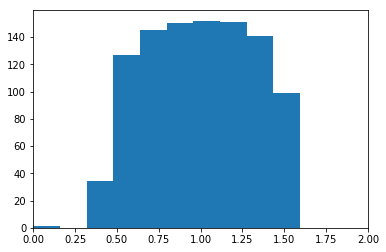

In [5]:
import networkx as nx
import numpy.linalg
import matplotlib.pyplot as plt

n = 1000 # 1000 nodes
m = 5000 # 5000 edges
G = nx.gnm_random_graph(n,m)

L = nx.normalized_laplacian_matrix(G)
e = numpy.linalg.eigvals(L.A)
print("Largest eigenvalue:", max(e))
print("Smallest eigenvalue:", min(e))
plt.hist(e,bins=10) # histogram with 100 bins
plt.xlim(0,2)  # eigenvalues between 0 and 2
plt.show()


['Hüsker Dü', 'Motörhead', 'Mötley Crüe', 'Spın̈al Tap', 'Blue Öyster Cult', 'Deathtöngue', 'Queensrÿche']


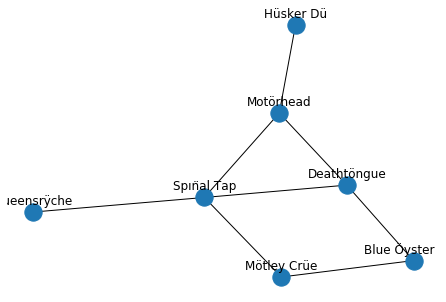

In [3]:

import networkx as NX
try:
    import pylab as P
except ImportError:
    pass

try:
    hd='H' + unichr(252) + 'sker D' + unichr(252)
    mh='Mot' + unichr(246) + 'rhead'
    mc='M' + unichr(246) + 'tley Cr' + unichr(252) + 'e'
    st='Sp' + unichr(305) + 'n' + unichr(776) + 'al Tap'
    q='Queensr' + unichr(255) + 'che'
    boc='Blue ' + unichr(214) +'yster Cult'
    dt='Deatht' + unichr(246) + 'ngue'
except NameError:
    hd='H' + chr(252) + 'sker D' + chr(252)
    mh='Mot' + chr(246) + 'rhead'
    mc='M' + chr(246) + 'tley Cr' + chr(252) + 'e'
    st='Sp' + chr(305) + 'n' + chr(776) + 'al Tap'
    q='Queensr' + chr(255) + 'che'
    boc='Blue ' + chr(214) +'yster Cult'
    dt='Deatht' + chr(246) + 'ngue'

G=NX.Graph()
G.add_edge(hd,mh)
G.add_edge(mc,st)
G.add_edge(boc,mc)
G.add_edge(boc,dt)
G.add_edge(st,dt)
G.add_edge(q,st)
G.add_edge(dt,mh)
G.add_edge(st,mh)

# write in UTF-8 encoding
fh=open('edgelist.utf-8','wb')
fh.write('# -*- coding: utf-8 -*-\n'.encode('utf-8')) # encoding hint for emacs
NX.write_multiline_adjlist(G,fh,delimiter='\t', encoding = 'utf-8')

# read and store in UTF-8
fh=open('edgelist.utf-8','rb')
H=NX.read_multiline_adjlist(fh,delimiter='\t', encoding = 'utf-8')

for n in G.nodes():
    if n not in H:
        print(False)

print(G.nodes())

try:
    pos=NX.spring_layout(G)
    NX.draw(G,pos,font_size=16,with_labels=False)
    for p in pos: # raise text positions
        pos[p][1]+=0.07
    NX.draw_networkx_labels(G,pos)
    P.show()
except:
    pass

In [7]:
from networkx import *
from math import *


nmax=10000
p=3
mach_eps=0.00000000001

def digitsrep(n,b=10):
    """Return list of digits comprising n represented in base b.
    n must be a nonnegative integer"""

    # very inefficient if you only work with base 10
    dlist=[]
    if n<=0:
        return [0]
    maxpow=int(floor( log(n)/log(b) + mach_eps ))
    pow=maxpow
    while pow>=0:
        x=int(floor(n // b**pow))
        dlist.append(x)
        n=n-x*b**pow
        pow=pow-1
    return dlist

def powersum(n,p,b=10):
    """Return sum of digits of n (in base b) raised to the power p."""
    dlist=digitsrep(n,b)
    sum=0
    for k in dlist:
        sum+=k**p
    return sum

def attractor153_graph(n,p,multiple=3,b=10):
    """Return digraph of iterations of powersum(n,3,10)."""
    G=DiGraph()
    for k in range(1,n+1):
        if k%multiple==0 and k not in G:
            k1=k
            knext=powersum(k1,p,b)
            while k1!=knext:
                G.add_edge(k1,knext)
                k1=knext
                knext=powersum(k1,p,b)
    return G

def squaring_cycle_graph_old(n,b=10):
    """Return digraph of iterations of powersum(n,2,10)."""
    G=DiGraph()
    for k in range(1,n+1):
        k1=k
        G.add_node(k1) # case k1==knext, at least add node
        knext=powersum(k1,2,b)
        G.add_edge(k1,knext)
        while k1!=knext: # stop if fixed point
             k1=knext
             knext=powersum(k1,2,b)
             G.add_edge(k1,knext)
             if G.out_degree(knext) >=1:
                 # knext has already been iterated in and out
                 break
    return G

def sum_of_digits_graph(nmax,b=10):
    def f(n): return powersum(n,1,b)
    return discrete_dynamics_digraph(nmax,f)

def squaring_cycle_digraph(nmax,b=10):
    def f(n): return powersum(n,2,b)
    return discrete_dynamics_digraph(nmax,f)

def cubing_153_digraph(nmax):
    def f(n): return powersum(n,3,10)
    return discrete_dynamics_digraph(nmax,f)

def discrete_dynamics_digraph(nmax,f,itermax=50000):
    G=DiGraph()
    for k in range(1,nmax+1):
        kold=k
        G.add_node(kold)
        knew=f(kold)
        G.add_edge(kold,knew)
        while kold!=knew and kold<<itermax:
        # iterate until fixed point reached or itermax is exceeded
            kold=knew
            knew=f(kold)
            G.add_edge(kold,knew)
            if G.out_degree(knew) >=1:
               # knew has already been iterated in and out
               break
    return G

def collatz_problem_digraph(nmax):
    def f(n):
        if n%2==0:
            return n // 2
        else:
            return 3*n+1
    return discrete_dynamics_digraph(nmax,f)

def fixed_points(G):
    """Return a list of fixed points for the discrete dynamical
    system represented by the digraph G.
    """
    return [n for n in G if G.out_degree(n)==0]


if __name__ == "__main__":
    nmax=10000
    print("Building cubing_153_digraph(%d)"% nmax)
    G=cubing_153_digraph(nmax)
    print("Resulting digraph has", len(G), "nodes and",
          G.size()," edges")
    print("Shortest path from 177 to 153 is:")
    print(shortest_path(G,177,153))
    print("fixed points are %s" % fixed_points(G))

Building cubing_153_digraph(10000)
Resulting digraph has 10000 nodes and 10000  edges
Shortest path from 177 to 153 is:
[177, 687, 1071, 345, 216, 225, 141, 66, 432, 99, 1458, 702, 351, 153]
fixed points are []


In [9]:
from multiprocessing import Pool
import time
import itertools
import networkx as nx


def chunks(l, n):
    """Divide a list of nodes `l` in `n` chunks"""
    l_c = iter(l)
    while 1:
        x = tuple(itertools.islice(l_c, n))
        if not x:
            return
        yield x


def _betmap(G_normalized_weight_sources_tuple):
    """Pool for multiprocess only accepts functions with one argument.
    This function uses a tuple as its only argument. We use a named tuple for
    python 3 compatibility, and then unpack it when we send it to
    `betweenness_centrality_source`
    """
    return nx.betweenness_centrality_source(*G_normalized_weight_sources_tuple)


def betweenness_centrality_parallel(G, processes=None):
    """Parallel betweenness centrality  function"""
    p = Pool(processes=processes)
    node_divisor = len(p._pool)*4
    node_chunks = list(chunks(G.nodes(), int(G.order()/node_divisor)))
    num_chunks = len(node_chunks)
    bt_sc = p.map(_betmap,
                  zip([G]*num_chunks,
                      [True]*num_chunks,
                      [None]*num_chunks,
                      node_chunks))

    # Reduce the partial solutions
    bt_c = bt_sc[0]
    for bt in bt_sc[1:]:
        for n in bt:
            bt_c[n] += bt[n]
    return bt_c

if __name__ == "__main__":
    G_ba = nx.barabasi_albert_graph(1000, 3)
    G_er = nx.gnp_random_graph(1000, 0.01)
    G_ws = nx.connected_watts_strogatz_graph(1000, 4, 0.1)
    for G in [G_ba, G_er, G_ws]:
        print("")
        print("Computing betweenness centrality for:")
        print(nx.info(G))
        print("\tParallel version")
        start = time.time()
        bt = betweenness_centrality_parallel(G)
        print("\t\tTime: %.4F" % (time.time()-start))
        print("\t\tBetweenness centrality for node 0: %.5f" % (bt[0]))
        print("\tNon-Parallel version")
        start = time.time()
        bt = nx.betweenness_centrality(G)
        print("\t\tTime: %.4F seconds" % (time.time()-start))
        print("\t\tBetweenness centrality for node 0: %.5f" % (bt[0]))
    print("")


Computing betweenness centrality for:
Name: 
Type: Graph
Number of nodes: 1000
Number of edges: 2991
Average degree:   5.9820
	Parallel version
		Time: 1.1386
		Betweenness centrality for node 0: 0.01793
	Non-Parallel version
		Time: 3.6404 seconds
		Betweenness centrality for node 0: 0.01793

Computing betweenness centrality for:
Name: 
Type: Graph
Number of nodes: 1000
Number of edges: 4921
Average degree:   9.8420
	Parallel version
		Time: 1.3481
		Betweenness centrality for node 0: 0.00196
	Non-Parallel version
		Time: 4.4334 seconds
		Betweenness centrality for node 0: 0.00196

Computing betweenness centrality for:
Name: 
Type: Graph
Number of nodes: 1000
Number of edges: 2000
Average degree:   4.0000
	Parallel version
		Time: 0.9763
		Betweenness centrality for node 0: 0.00823
	Non-Parallel version
		Time: 3.1401 seconds
		Betweenness centrality for node 0: 0.00823

